## Introduction

### Problem Formulation

The data we are using is a list of independent variables that likely affect the compressive strength of concrete. There are 1030 different concrete samples (datapoints) and 8 different features provided, including amounts of cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate in $kg/m^3$ as well as its age in days.

I have two separate questions I want to answer based on the univariate and multivariate case. For the...
- Univariate case: Which single feature is the most predictive of compressive strength? 
- Multivariate case: how well do the 8 different features of concrete predict its compressive strength?

Application-wise, understanding the former question might help a construction company to determine which feature is most important to creating strong concrete. Understanding the latter question will help that same company predict the strength of their concrete samples even without the associated compressive strength measurements.

---

### Details of Algorithm

**Objective Function**: Mean squared error

**Update step**: gradient descent (non-stochastic) 

**Stopping criterion**:
- If there is minimal changes in the objective function 
- Else, when the maximum number of iterations has been reached

**Learning rate (alpha)**: 0.008 for univariate, 0.004 for all features

I chose this learning rate experimentally to prevent either learning rates too small that converge too slowly or learning rates too large that perform badly. For instance for the univariate case, I tried within the range from $1e-7$ to 0.1 and noticed the best MSE at 0.001 and 0.01. To further narrow it down, I looked within the range of $[0.001,0.01]$ in increments of 0.001 and noticed that 0.008 had the lowest MSEs and a low number of iterations for repeated trials. I did the same when considering all features in the multivariate case. 

---

### Pseudo-code



TODO
- Load in data
- calculate updates (gradient descent)
- Update weights 
- rerun multiple iterations

Results

Variance Explained (training data, test data)
- Cement: 
- Blast Furnace Slag:
- Fly Ash
- Water
- Superplasticizer
- Coarse Aggregate
- Fine Aggregate
- Age
- All Features:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "./data/Concrete_Data.xls"

raw_df = pd.read_excel(path)
raw_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
for i in raw_df.columns:
    print(i.split(" ("))

['Cement', 'component 1)(kg in a m^3 mixture)']
['Blast Furnace Slag', 'component 2)(kg in a m^3 mixture)']
['Fly Ash', 'component 3)(kg in a m^3 mixture)']
['Water ', 'component 4)(kg in a m^3 mixture)']
['Superplasticizer', 'component 5)(kg in a m^3 mixture)']
['Coarse Aggregate ', 'component 6)(kg in a m^3 mixture)']
['Fine Aggregate', 'component 7)(kg in a m^3 mixture)']
['Age', 'day)']
['Concrete compressive strength(MPa, megapascals) ']


In [5]:
raw_df.columns = [col.split("(")[0].strip() for col in raw_df.columns]
raw_df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [63]:
def trainLinearRegression(X, y, isUnivariate, alpha, maxIters, threshold, log=False):
    '''
    Train on labeled data to get the weights and error of a linear model.
    
    Parameters:
        X: array of features
        y: array of observed labels
        alpha: learning rate
        maxIters: maximum number of iterations
        threshold: termination criteria for gradient descent
        log: if True, log output as training occurs
        
    Returns:
        m: slope of linear regressor
        b: bias of linear regressor
        error: mean squared error on test data
    '''
    # set up variables 
    X, y, b = np.array(X), np.array(y), 1
    n = len(y)
    mses = np.zeros(maxIters+1)
    mses[0] = float('inf')
    overThreshold = True
    
    assert len(X)==len(y), "data is not the same length"
    
    if isUnivariate:
        X = X.reshape(-1,1)
#         m = np.random.rand(1)
        m = [0]
    else:
#         m = np.random.rand(X.shape[1])
        m = np.zeros(X.shape[1])
    
    m_star, b_star, mse_star = m, b, mses[0]
    iters = 0

    if log: print("starting training...")
    while iters < maxIters and overThreshold:
        m_updates = np.zeros(len(m))
        b_update, sse = 0, 0
        
        for i in range(n):
            x = X[i,:].reshape(-1,1)
            y_pred = (np.dot(m,x) + b)
            error = y[i] - y_pred
            sse += (error)**2
            
            m_update = x @ error
            b_update += error
        
        m += 2*alpha*m_update/n
        b += 2*alpha*b_update/n    
        

        iters += 1
        mses[iters] = sse/n
        
        if mses[iters] < mse_star: m_star, b_star, mse_star = np.array(m), np.array(b), mses[iters]
        overThreshold = np.abs(mses[iters-1]-mses[iters]) > threshold
        if log and iters % 100 == 0: print(f"iteration {iters}... m: {m}, b: {b}, MSE: {mses[iters]}")
    
    print(f"Iterations: {iters}, m: {m_star}, b: {b_star}, MSE: {mse_star}")
    return m_star, b_star, mse_star
    
#     while iters < maxIters and (np.abs(m_update) > threshold or np.abs(b_update) > threshold):
#         y_pred = (np.matmul(X,m) + b)
        
#         m_sum = y - y_pred
#         b_sum = np.sum(y - y_pred)
        
#         m_update = 2*alpha*np.matmul(np.transpose(X),m_sum)/n
#         b_update = 2*alpha*b_sum/n
        
        
#         m = m + m_update # do this order so using old m and b
#         b = b + b_update
        
#         mses[iters] = ((y - y_pred)**2).sum()/n
        
#         print(iters, m, b, mses[iters])
#         iters+=1
    
#     print("min mse", mses[mses>0].min())
#     return m,b

In [53]:
def calculateVarianceExplained(X, y, m, b, univariate): 
    '''
    Test linear regression model on labeled data to get the explained variance
    
    Parameters:
        m: weight vector
        b: bias constant
        X: array of features
        y: observed data labels
        univariate: if function is univariate

    Returns:
        var_explained: variance explained given by 1-(MSE/variance observered)
    '''
    # calculate MSE
    sse, n = 0, len(y)
    X, y = np.array(X),np.array(y)
    if univariate: X = X.reshape(-1,1)
    
    for i in range(n):
            x = X[i,:].reshape(-1,1)
            y_pred = (np.dot(m,x) + b)
            error = y[i] - y_pred
            sse += (error)**2
    mse = sse/n
    
    # calculate variances
    var_observed = np.var(y)
    var_explained = 1 - (mse/var_observed)
    
    return var_explained
        

In [77]:
features = raw_df.columns[0:-1]
target = raw_df.columns[-1]
print(f"Features: {features}")
print(f"Target: {target}")

Features: Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')
Target: Concrete compressive strength


In [85]:
# train all single-feature models and the all-feature model
models_cols = [feature for feature in features]
m_vals, b_vals, mses = [0] *len(models_cols), [0] * len(models_cols), [0] * len(models_cols)
df_train = raw_df.iloc[0:900]

y = df_train[target]

for i, cols in enumerate(models_cols):
    x = df_train[cols]
    
    # get values
    m_vals[i], b_vals[i], mses[i] = trainLinearRegression(x, y, True, 0.004, 4000, 0.0001)

Iterations: 4000, m: [0.06763015], b: [3.73858169], MSE: 397.94285372269184
Iterations: 762, m: [0.], b: [36.29696801], MSE: 295.8709198476622
Iterations: 2110, m: [-0.17715098], b: [37.33451825], MSE: 458.6482541048319
Iterations: 318, m: [-0.24682281], b: [58.48940362], MSE: 776.0563602708361
Iterations: 4000, m: [-0.26603052], b: [33.84280538], MSE: 338.7523213805012


/var/folders/4b/jfgczg_n6239k0ssg5vw1_g40000gn/T/ipykernel_36789/4213783210.py:47: RuntimeWarning: overflow encountered in add
  sse += (error)**2
/var/folders/4b/jfgczg_n6239k0ssg5vw1_g40000gn/T/ipykernel_36789/4213783210.py:60: RuntimeWarning: invalid value encountered in double_scalars
  overThreshold = np.abs(mses[iters-1]-mses[iters]) > threshold


Iterations: 175, m: [0.10613727], b: [1.28299758], MSE: 1547.23401738418
Iterations: 223, m: [-0.34192022], b: [1.01706464], MSE: 1496.4042908555546
Iterations: 4000, m: [0.00046623], b: [20.47818403], MSE: 547.4221896517633


In [86]:
for i in [3, -2,-3]:
    x = df_train[models_cols[i]]
    
    # get values
    print(models_cols[i])
    m_vals[i], b_vals[i], mses[i] = trainLinearRegression(x, y, True, 0.001, 4000, 0.0001)

Water
Iterations: 1266, m: [-0.24632432], b: [58.39918101], MSE: 776.0562948354054
Fine Aggregate
Iterations: 2951, m: [0.01164204], b: [1.10719063], MSE: 642.1257194714344
Coarse Aggregate
Iterations: 2820, m: [-0.01403325], b: [1.26490352], MSE: 321.16872963175297


/var/folders/4b/jfgczg_n6239k0ssg5vw1_g40000gn/T/ipykernel_36789/4213783210.py:47: RuntimeWarning: overflow encountered in add
  sse += (error)**2
/var/folders/4b/jfgczg_n6239k0ssg5vw1_g40000gn/T/ipykernel_36789/4213783210.py:60: RuntimeWarning: invalid value encountered in double_scalars
  overThreshold = np.abs(mses[iters-1]-mses[iters]) > threshold


In [67]:
print(models_cols)
m_vals

['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate']


[array([0.06868223]),
 array([0.]),
 array([-0.17795289]),
 array([-0.24781884]),
 array([-0.26409495]),
 array([0.21227454]),
 array([0.17606427])]

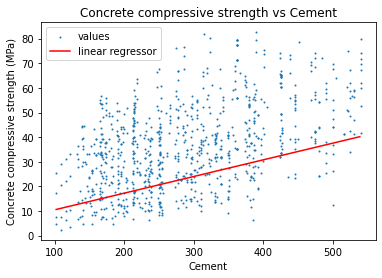

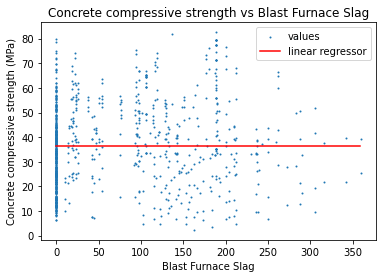

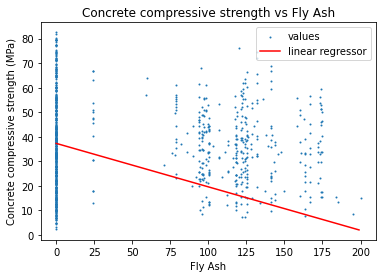

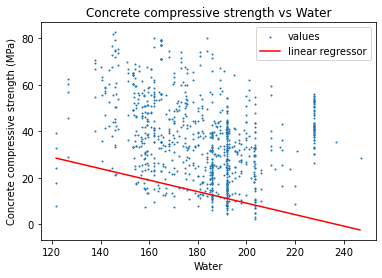

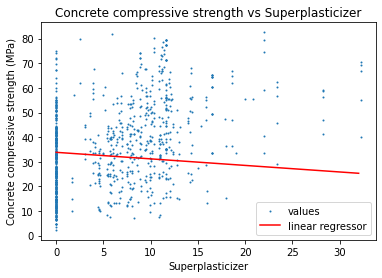

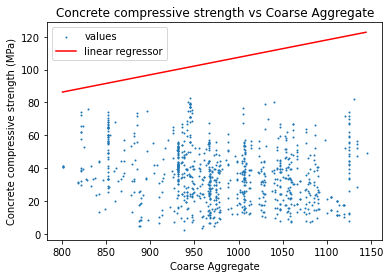

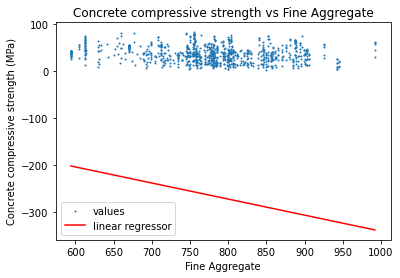

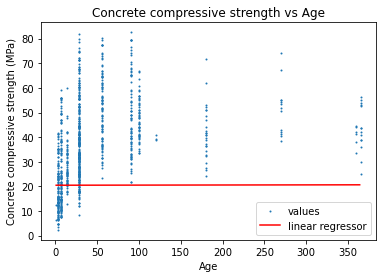

In [82]:
# scatter plot
for i, m_val in enumerate(m_vals):
    x = df_train[models_cols[i]]
    plt.figure()
    plt.scatter(x, y, s=1, label='values')
    
    x_vals = np.arange(x.min(),x.max())
    y_vals = x_vals*m_vals[i]+b_vals[i]
    plt.plot(x_vals, y_vals, c="red", label='linear regressor')
    plt.xlabel(models_cols[i])
    plt.ylabel(f"{target} (MPa)")
    plt.title(f"{target} vs {models_cols[i]}")
    plt.legend()
    plt.savefig(f"./figures/{models_cols[i].replace(" ", "_")}_univariate_model")
    plt.show()

In [24]:
# TODO: DELETE

for alpha in range(3, 11, 1):
    alpha = alpha/1000.0
    print(alpha)
    trainLinearRegression(raw_df[features[0]], raw_df[target], True, alpha, 1000, 0.0001)

0.003
Number of iterations: 1000... m: [0.08934058], b: [9.11619019], MSE: 213.25774336612423
0.004
Number of iterations: 882... m: [0.08268412], b: [10.85487023], MSE: 212.7560166636425
0.005
Number of iterations: 706... m: [0.0826614], b: [10.86080446], MSE: 212.7560133104532
0.006
Number of iterations: 589... m: [0.08261241], b: [10.87360107], MSE: 212.7560191857023
0.007
Number of iterations: 505... m: [0.08260282], b: [10.87610627], MSE: 212.7560173143688
0.008
Number of iterations: 442... m: [0.08259323], b: [10.87861142], MSE: 212.75601572619692
0.009
Number of iterations: 1000... m: [0.08258364], b: [10.88111651], MSE: 212.75601442097883
0.01
Number of iterations: 354... m: [0.08254776], b: [10.89048627], MSE: 212.75602773139275


In [36]:
# TODO: DELETE

for a in range(1,8,1):
    alpha = a/1000
    print(alpha)
    trainLinearRegression(raw_df[features], raw_df[target], True, alpha, 4000, 0.0001)

0.001
starting training...
Number of iterations: 3022... m: [-0.00051434], b: [32.62409017], MSE: 290.2932868661672
0.002
starting training...
Number of iterations: 1512... m: [-0.00052141], b: [32.62683462], MSE: 290.2933140150318
0.003
starting training...
Number of iterations: 4000... m: [-0.00056316], b: [32.64304467], MSE: 290.29329173497706
0.004
starting training...
Number of iterations: 4000... m: [-0.00057023], b: [32.64579083], MSE: 290.2932833480323
0.005
starting training...
Number of iterations: 4000... m: [-0.00059464], b: [32.65526775], MSE: 290.2932863458088
0.006
starting training...
Number of iterations: 4000... m: [-0.00058438], b: [32.65128522], MSE: 290.2933441328466
0.007
starting training...
Number of iterations: 4000... m: [0.16585949], b: [1.4874497], MSE: 1491.0904571265596


In [29]:
# loop with dot
trainLinearRegression(raw_df["Cement"], raw_df["Concrete compressive strength"], True, 0.01, 1000, 0.0001)
# trainLinearRegression(raw_df["Cement"], raw_df["Concrete compressive strength"], True, 0.01, 2, 0.0001)

starting training...
iteration 100... m: [0.12752233], b: [-0.85694798], MSE: 235.52464565182774
iteration 200... m: [0.12074486], b: [0.91333715], MSE: 229.17460096986446
iteration 300... m: [0.11284893], b: [2.97576894], MSE: 223.08296753814176
iteration 400... m: [0.10364994], b: [5.37855978], MSE: 217.75913541427553
iteration 500... m: [0.09293287], b: [8.17787844], MSE: 213.9633217366472
iteration 600... m: [0.08044718], b: [11.43916314], MSE: 212.80754718334936
iteration 700... m: [0.06590099], b: [15.2386512], MSE: 215.89456479070355
iteration 800... m: [0.04895429], b: [19.66516127], MSE: 225.50861047806055
iteration 900... m: [0.02921089], b: [24.82216956], MSE: 244.8768510578803
iteration 1000... m: [0.00620929], b: [30.83022873], MSE: 278.52720911660856
Number of iterations: 1000... m: [0.08257523], b: [10.88331178], MSE: 212.7560131190216


(array([0.08257523]), array([10.88331178]), 212.7560131190216)

In [55]:
calculateVarianceExplained(raw_df.loc[0:900, features[0]], raw_df.loc[0:900, target], [0.08259323], 10.87861142, True)

array([0.2193293])

In [97]:
# matmul with low iters
trainLinearRegression(raw_df["Cement"], raw_df["Concrete compressive strength"], True, 0.01, 10, 0.001)

0 [78.61010661] 1.2756255850227862 399.88044882912305
1 [-141153.34179803] -440.08273487965073 554282686.4934843
2 [2.53839457e+08] 793318.8037564246 1792529604966882.5
3 [-4.56485231e+11] -1426641169.0475633 5.796976501307548e+21
4 [8.20907706e+14] 2565561053669.462 1.8747214251636904e+28
5 [-1.47625688e+18] -4613706415976080.0 6.062781902212374e+34
6 [2.6547861e+21] 8.296932502301246e+18 1.960681939215817e+41
7 [-4.77416184e+24] -1.4920561202024206e+22 6.340775123981095e+47
8 [8.58548311e+27] 2.683198236475985e+25 2.0505839508562913e+54
9 [-1.54394683e+31] -4.825256020028995e+28 6.631515007694086e+60
min mse 399.88044882912305


(array([-1.54394683e+31]), -4.825256020028995e+28)

## VALIDATING IMPLEMENTATION (TO DELETE)

In [38]:
# test linear regression implementation
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

In [39]:
X_one = raw_df["Cement"].values.reshape(-1,1)
y = raw_df["Concrete compressive strength"].values.reshape(-1,1)
reg_one = LinearRegression().fit(X_one,y)
y_pred_one = reg.predict(X_one)
squares = (y-y_pred_one)**2
squares.sum()/len(y)
#219139.54600767

NameError: name 'LinearRegression' is not defined

In [37]:
X_all = raw_df.drop("Concrete compressive strength",axis=1)
reg_all = LinearRegression().fit(X_all.iloc[0:900],y[0:900])
y_pred_all = reg_all.predict(X_all.iloc[900:])
squares = (y[0:900]-y_pred_all)**2
squares.sum()/len(y)

NameError: name 'LinearRegression' is not defined

In [57]:
# np.dot([[1,2][3,5]],[0,1])
print(np.dot(np.array([0,1]),np.array([[1,2],[3,5]])))
print(np.dot(np.array([[1,2],[3,5]]),np.array([0,1])))
print(np.matmul(np.array([[1,2],[3,5]]),np.array([0,1])))
print(np.matmul(np.array([0,1]),np.array([[1,2],[3,5]])))

[3 5]
[2 5]
[2 5]
[3 5]


In [203]:
raw_df[["Cement","Blast Furnace Slag"]].shape

(1030, 2)

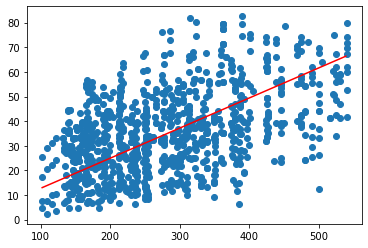

In [264]:
plt.scatter(raw_df["Cement"], raw_df["Concrete compressive strength"])

tings = np.arange(raw_df["Cement"].min(),raw_df["Cement"].max())
vals = tings*0.12213476+0.55029265
plt.plot(tings, vals, c="red")